In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
data_yndx = pd.read_csv("YNDX.csv")
data_vkco = pd.read_csv("VKCO.IL.csv")
data_tcs_il = pd.read_csv("TCS.IL.csv")
data_poly_il = pd.read_csv("POLY.L.csv")
data_vkco

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-07,21.719999,22.120001,21.360001,21.600000,21.600000,506210
1,2019-11-08,21.420000,21.616501,21.020000,21.340000,21.340000,128942
2,2019-11-11,21.940001,21.940001,20.500000,20.600000,20.600000,168007
3,2019-11-12,21.219999,21.219999,20.700001,20.840000,20.840000,78432
4,2019-11-13,20.799999,20.799999,20.500000,20.700001,20.700001,51999
...,...,...,...,...,...,...,...
249,2020-11-02,26.000000,26.549999,25.900000,26.049999,26.049999,457904
250,2020-11-03,26.600000,26.700001,26.450001,26.549999,26.549999,596269
251,2020-11-04,26.500000,27.500000,26.450001,27.049999,27.049999,364102
252,2020-11-05,27.600000,28.500000,27.500000,28.350000,28.350000,742083


In [4]:
def show_history(dataframe):
    plt.rcParams['font.size'] = '20'
    fig, ax = plt.subplots()

    ax.plot(dataframe['Date'], dataframe['Close'], 'r', linewidth=2, label='real')

    ax.grid(color = 'black',    #  цвет линий
            linewidth = 1,    #  толщина
            linestyle = '-')    #  начертание


    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))  # интервал написания значений оси OX
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
    plt.xticks(rotation=25)

    fig.set_figwidth(30)
    fig.set_figheight(13)

    plt.title("YNDX")
    plt.legend(pd.DataFrame(dataframe.Close))
    plt.show()

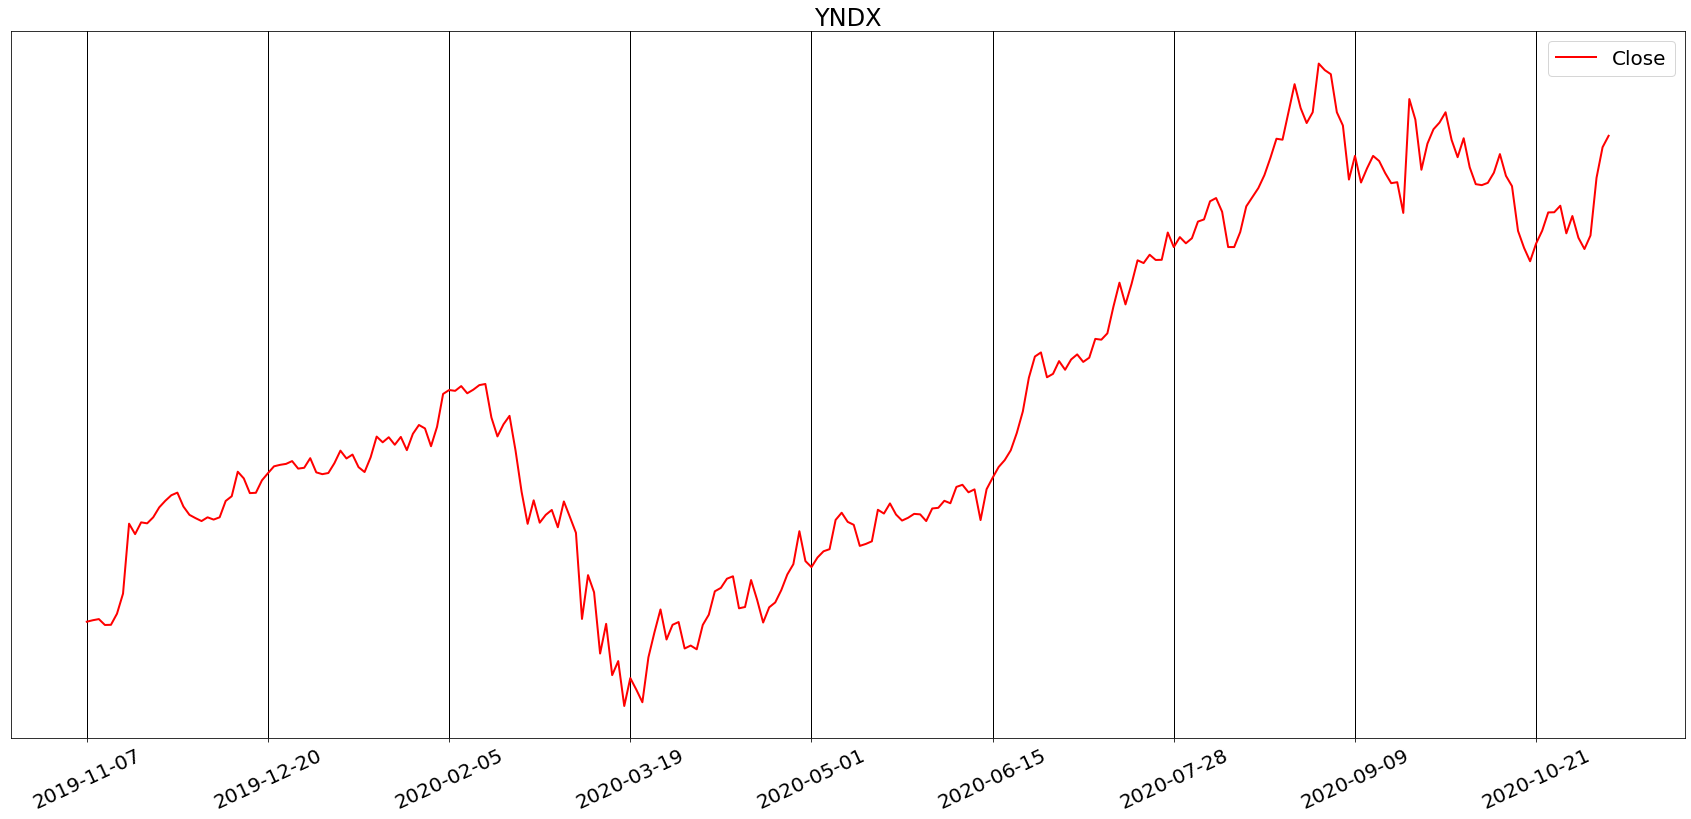

In [5]:
show_history(data_yndx)

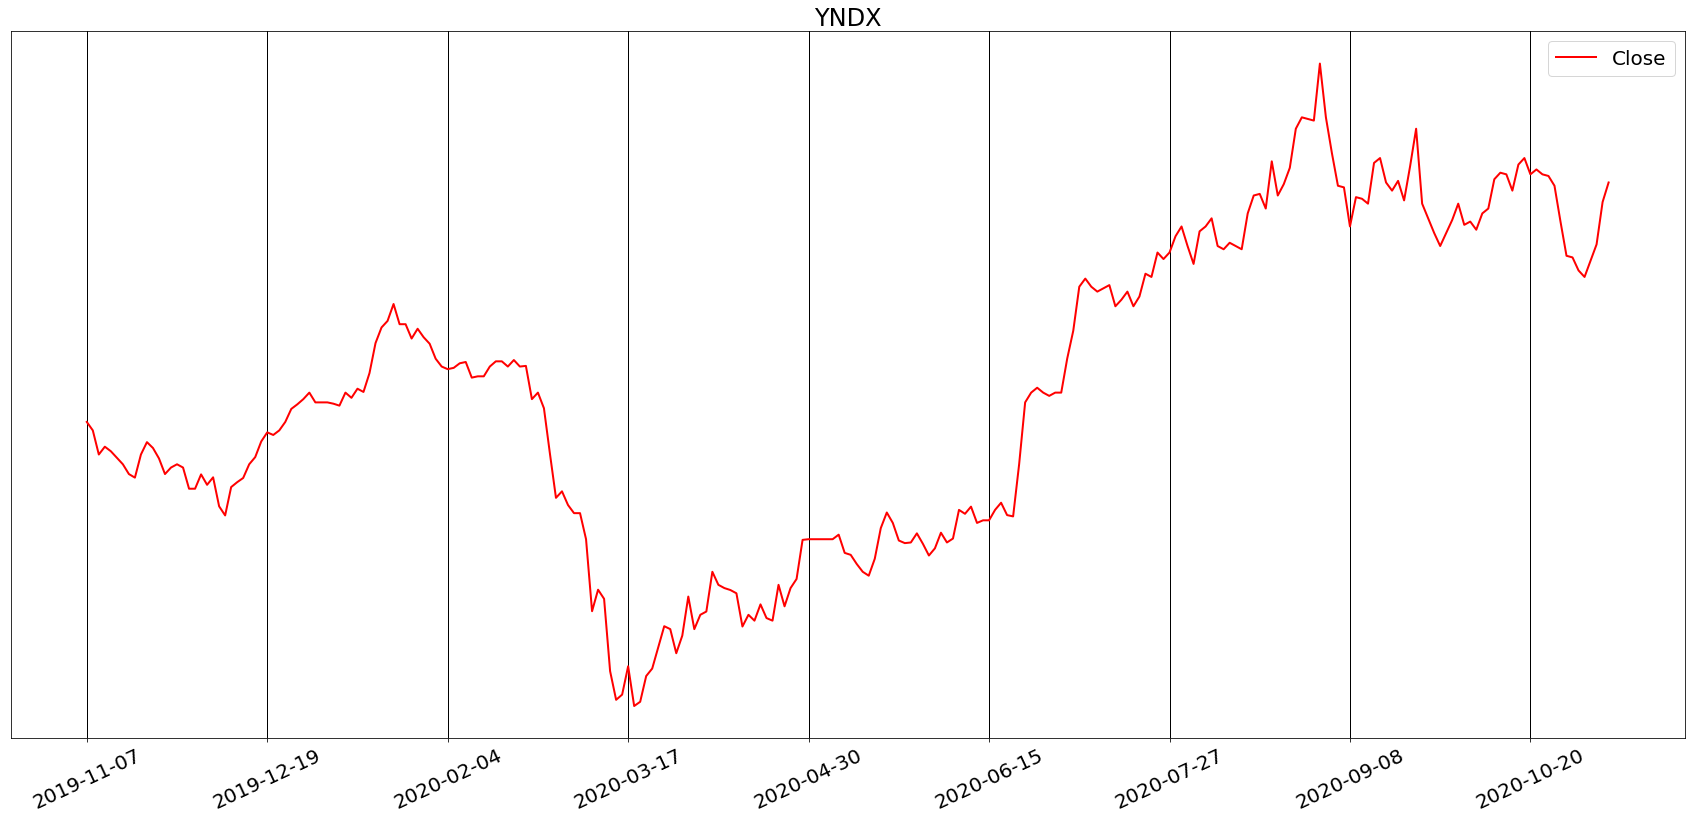

In [6]:
show_history(data_vkco)

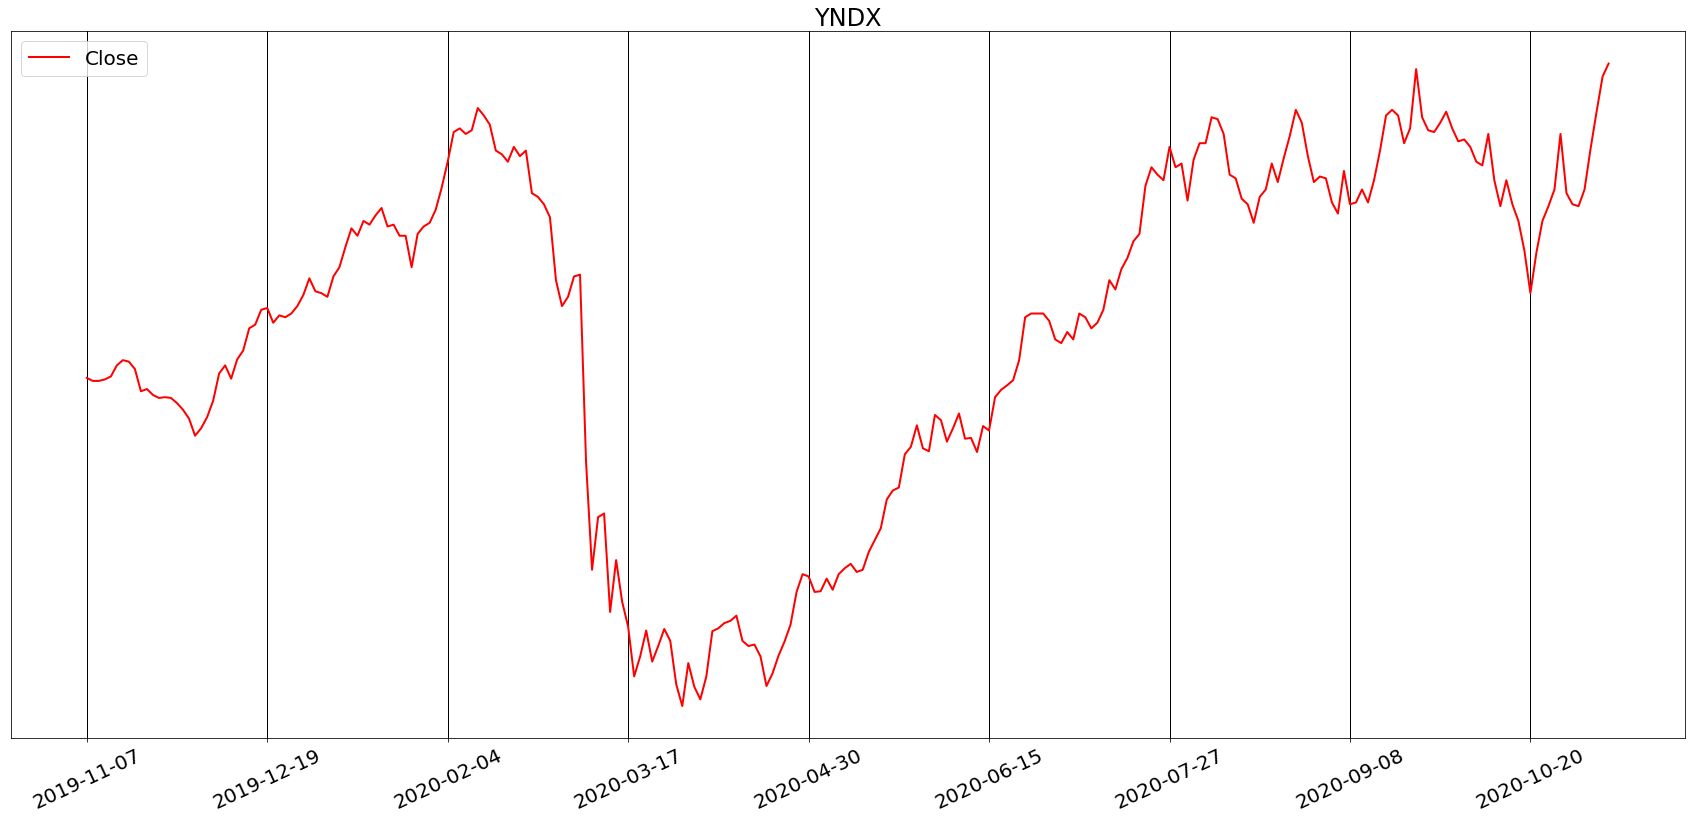

In [7]:
show_history(data_tcs_il)

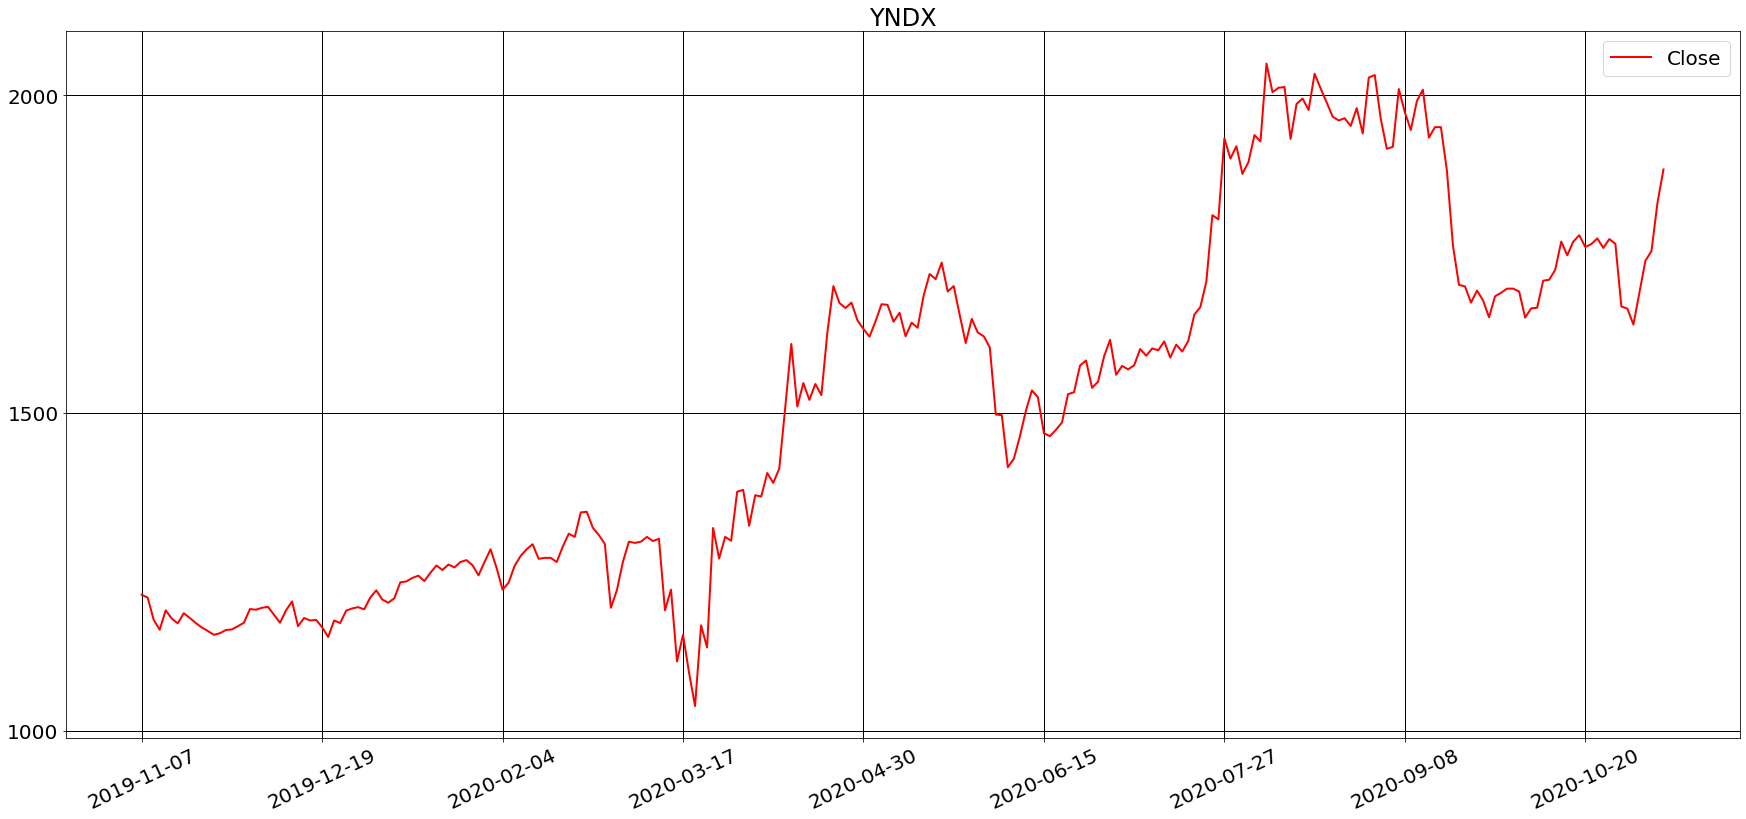

In [8]:
show_history(data_poly_il)

In [9]:
d = {'YNDX': data_yndx['Close'], 'VKCO': data_vkco['Close'], 'TCS_IL': data_tcs_il['Close'], 'POLY_IL': data_poly_il['Close']}
data = pd.DataFrame(data=d)
data

,YNDX,VKCO,TCS_IL,POLY_IL
0,34.070000,21.600000,19.260000,1214.5
1,34.160000,21.340000,19.180000,1210.0
2,34.230000,20.600000,19.180000,1175.0
3,33.869999,20.840000,19.219999,1159.5
4,33.880001,20.700001,19.299999,1190.0
...,...,...,...,...
249,57.709999,26.049999,24.350000,1689.5
250,61.240002,26.549999,25.450001,1740.0
251,63.110001,27.049999,26.450001,1755.0
252,63.810001,28.350000,27.400000,1831.0


In [10]:
def show_corr(dataframe):
    plt.figure(figsize=(22,18), dpi= 50)
    sns.heatmap(dataframe.corr(), xticklabels=dataframe.corr().columns, yticklabels=dataframe.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title('Correlogram of mtcars', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

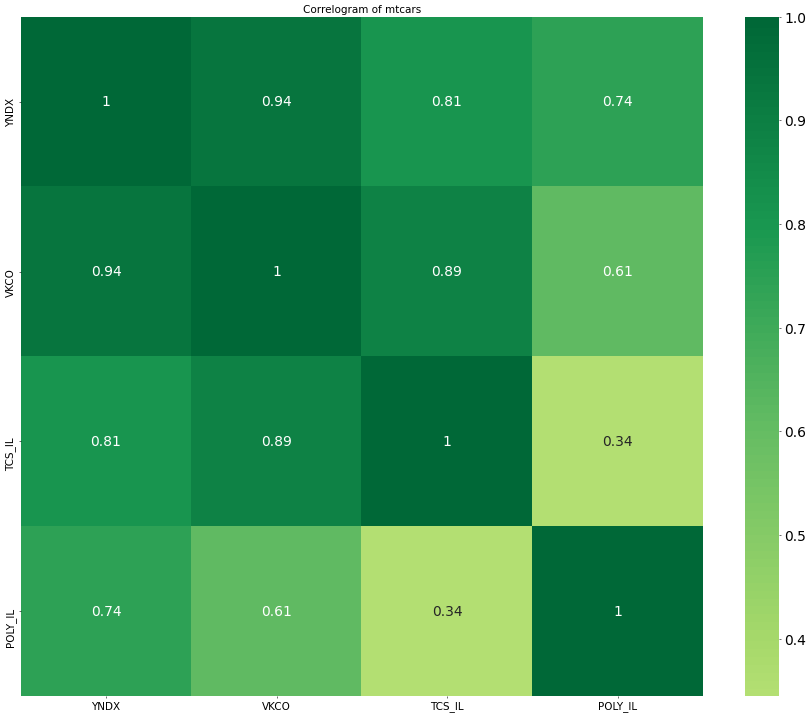

In [11]:
show_corr(data)

# Распределение случайной величины

In [86]:
def get_random_variable_distribution(dataframe):
    data_distribution = dataframe['Close'].value_counts()
    #print(data_distribution)
    data_distribution = pd.DataFrame(data_distribution).reset_index()
    data_distribution.rename(columns={'index': 'value', 'Close': 'count'}, inplace=True)
    data_distribution.sort_values(['value'], inplace=True)
    return data_distribution

In [87]:
def show_random_variable_distribution(dataframe):
    plt.rcParams['font.size'] = '20'
    fig, ax = plt.subplots()

    ax.plot(dataframe['value'], dataframe['count'], 'r', linewidth=2, label='real')

    ax.grid(color = 'black',    #  цвет линий
            linewidth = 0.5,    #  толщина
            linestyle = '-')    #  начертание

    fig.set_figwidth(30)
    fig.set_figheight(13)

    plt.title("S&P 500 Index")
    plt.legend(dataframe['value'])
    plt.show()

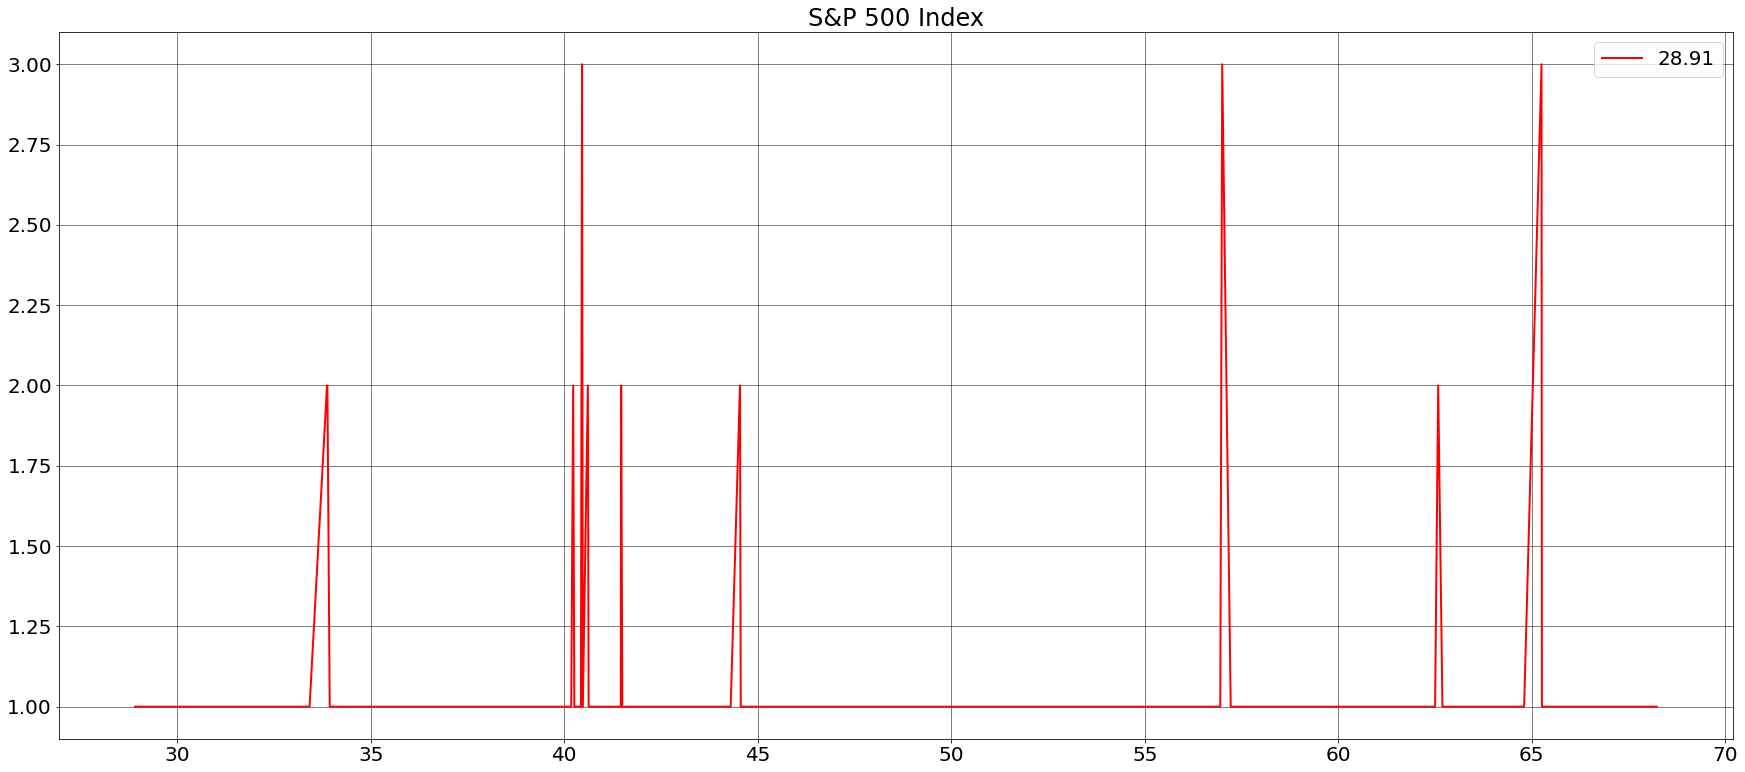

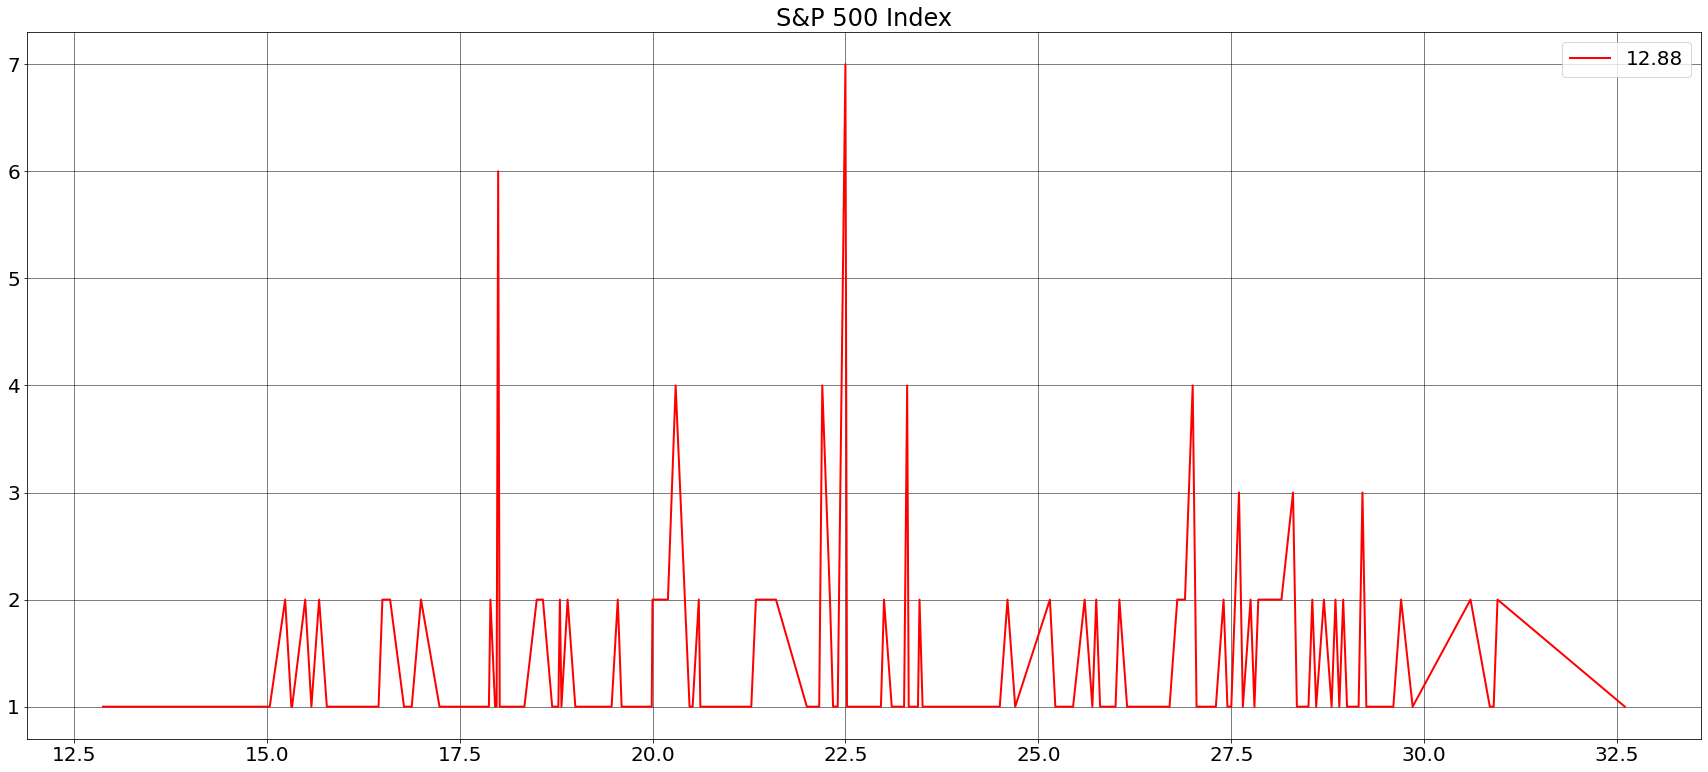

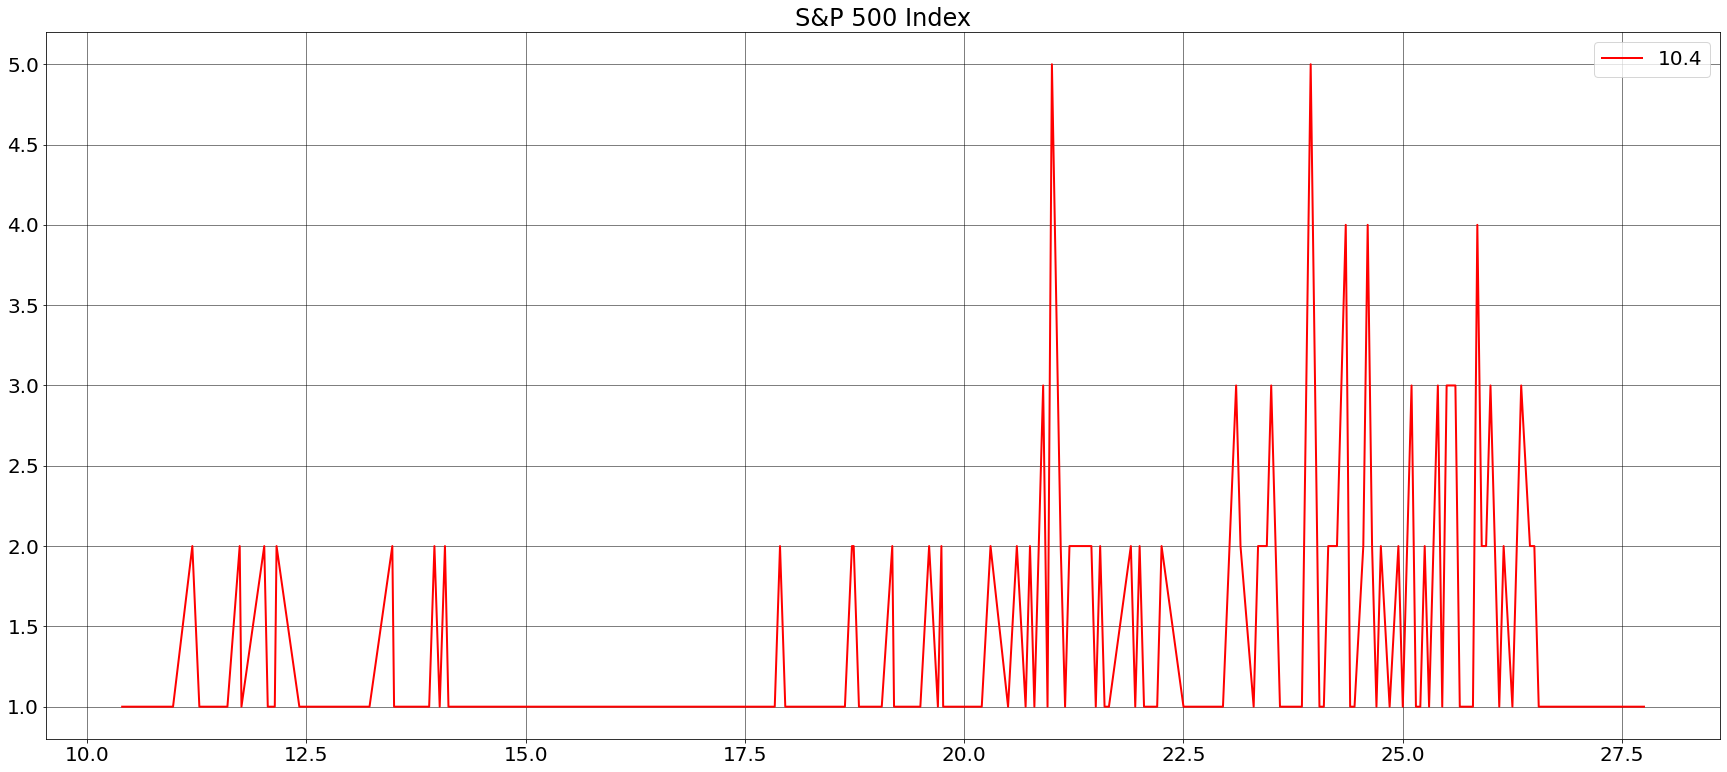

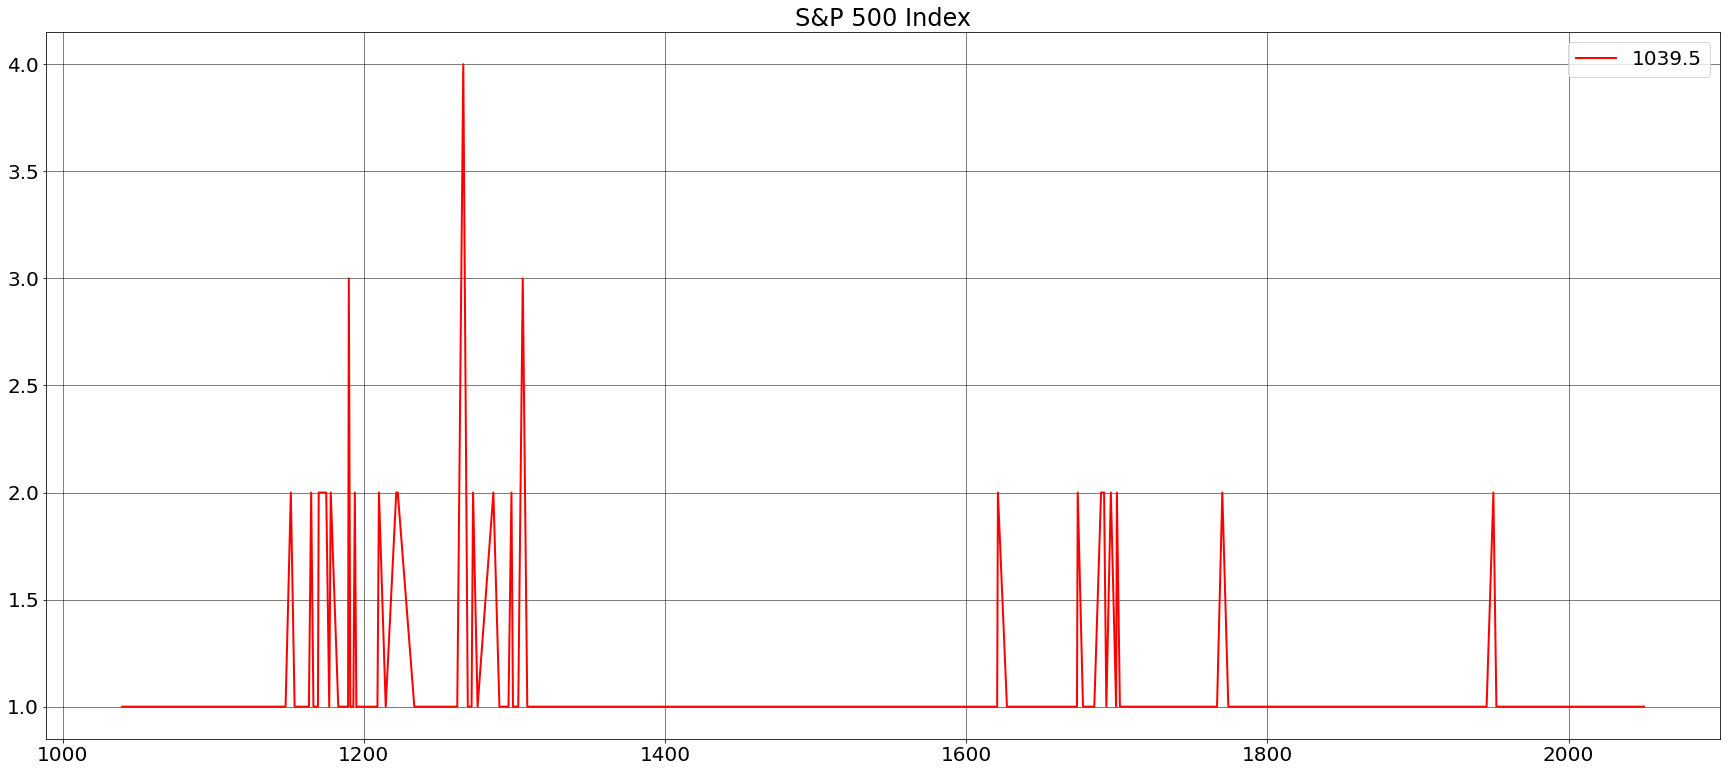

In [91]:
show_random_variable_distribution(get_random_variable_distribution(data_yndx))
show_random_variable_distribution(get_random_variable_distribution(data_vkco))
show_random_variable_distribution(get_random_variable_distribution(data_tcs_il))
show_random_variable_distribution(get_random_variable_distribution(data_poly_il))

In [92]:
def get_point(dataframe):
    fig, ax = plt.subplots()

    ax.scatter(dataframe['value'], dataframe['count'], c = 'deeppink')    #  цвет точек

    ax.set_facecolor('black')     #  цвет области Axes
    ax.set_title('Один цвет')     #  заголовок для Axes

    fig.set_figwidth(8)     #  ширина и
    fig.set_figheight(8)    #  высота "Figure"

    plt.show()

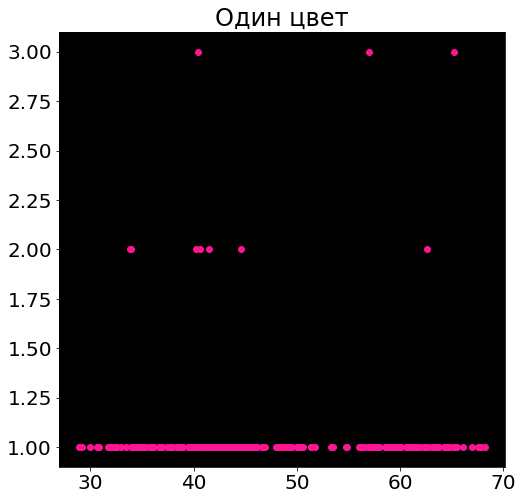

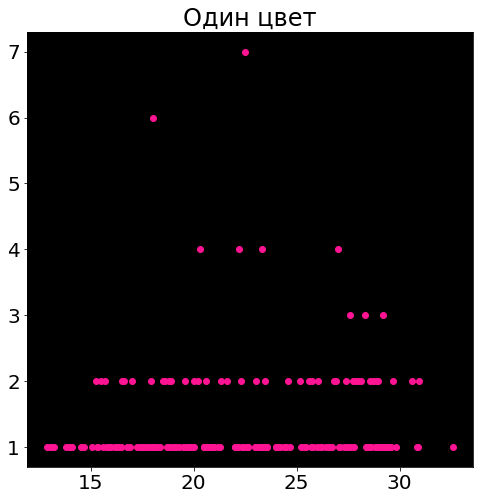

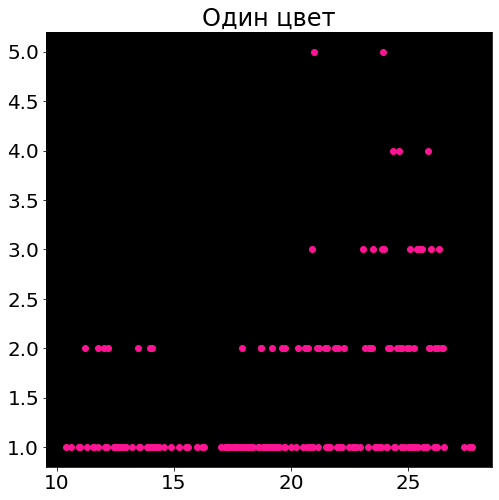

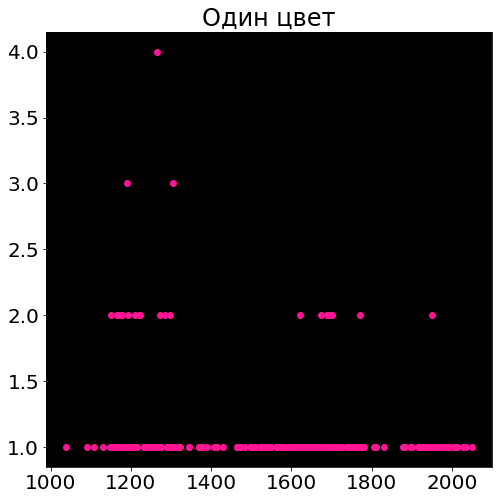

In [95]:
get_point(get_random_variable_distribution(data_yndx))
get_point(get_random_variable_distribution(data_vkco))
get_point(get_random_variable_distribution(data_tcs_il))
get_point(get_random_variable_distribution(data_poly_il))